In [1]:
# !pip install wbgapi

In [2]:
import wbgapi as wb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from matplotlib import cm

In [3]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


### 데이터 로드 및 전처리

In [4]:
# load data

fossil = wb.data.DataFrame('EG.USE.COMM.FO.ZS').iloc[:,-10:]
renewable = wb.data.DataFrame('EG.FEC.RNEW.ZS').iloc[:,-10:]

metadata_capita = pd.read_csv('/Users/philip_cho/Desktop/공부자료/동국대학교/4학년 2학기/데이터분석 및 시각화/기말과제/data/data/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3052552.csv')

In [5]:
metadata_capita = metadata_capita.iloc[:,:2].rename(columns={'Country Code':'economy'})

In [6]:
fossil = fossil.reset_index()
renewable = renewable.reset_index()

In [7]:
fossil = pd.merge(fossil, metadata_capita, on='economy')
renewable = pd.merge(renewable, metadata_capita, on='economy')

In [8]:
df = wb.economy.DataFrame()
country_name = {}

for ticker in df.index:
    country_name[ticker] = df.loc[ticker][0]

In [9]:
country = pd.DataFrame([country_name.keys(), country_name.values()]).T
country = country.rename({0:'economy', 1:'country'}, axis=1)

fossil = pd.merge(fossil, country, on='economy')
renewable = pd.merge(renewable, country, on='economy')

In [10]:
fossil = fossil.set_index('country')
renewable = renewable.set_index('country')

In [11]:
fossil = fossil.dropna(axis=1, how='all')
renewable = renewable.dropna(axis=1, how='all')

In [12]:
fossil_drop = fossil[fossil['Region'].isna()].index
renewable_drop = renewable[renewable['Region'].isna()].index

fossil = fossil.drop(fossil_drop, axis=0)
renewable = renewable.drop(renewable_drop, axis=0)

### Fossil Fuel Energy Consumption

In [13]:
fossil.head(10)

,economy,YR2011,YR2012,YR2013,YR2014,YR2015,Region
country,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,South Asia
Angola,AGO,43.849784,48.010060,46.508554,48.305593,NaN,Sub-Saharan Africa
Albania,ALB,61.502765,57.754082,56.395339,61.421801,NaN,Europe & Central Asia
Andorra,AND,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
United Arab Emirates,ARE,91.675585,90.104537,93.614883,86.128349,NaN,Middle East & North Africa
Argentina,ARG,88.853811,89.024907,88.966064,87.722407,NaN,Latin America & Caribbean
Armenia,ARM,71.549930,77.332943,75.492844,74.561866,NaN,Europe & Central Asia
American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


In [51]:
fossil[fossil['Region']=='Europe & Central Asia']

,economy,YR2011,YR2012,YR2013,YR2014,YR2015,Region
country,,,,,,,
Albania,ALB,61.502765,57.754082,56.395339,61.421801,NaN,Europe & Central Asia
Andorra,AND,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
Armenia,ARM,71.549930,77.332943,75.492844,74.561866,NaN,Europe & Central Asia
Austria,AUT,69.154183,67.302507,66.253804,64.813156,65.661822,Europe & Central Asia
Azerbaijan,AZE,97.862572,98.476702,98.211233,98.365990,NaN,Europe & Central Asia
Belgium,BEL,70.254496,71.115714,70.820306,72.652505,75.870784,Europe & Central Asia
Bulgaria,BGR,75.043951,72.187100,70.208479,71.045923,NaN,Europe & Central Asia
Bosnia and Herzegovina,BIH,93.996643,91.947803,92.504002,77.522045,NaN,Europe & Central Asia
Belarus,BLR,91.392471,91.047270,90.672040,92.440375,NaN,Europe & Central Asia


In [28]:
# 데이터의 연도별 차이가 크지 않음. 따라서 국가별 결측치가 가장 덜 한 YR2013을 기준으로 분석함
# mean(): 결측국가 평균에서 제외
continent_fossil = fossil.groupby('Region')['YR2013'].mean()
continent_fossil

Region
East Asia & Pacific           76.182873
Europe & Central Asia         72.777717
Latin America & Caribbean     67.737371
Middle East & North Africa    96.925299
North America                 78.057013
South Asia                    52.795889
Sub-Saharan Africa            36.018263
Name: YR2013, dtype: float64

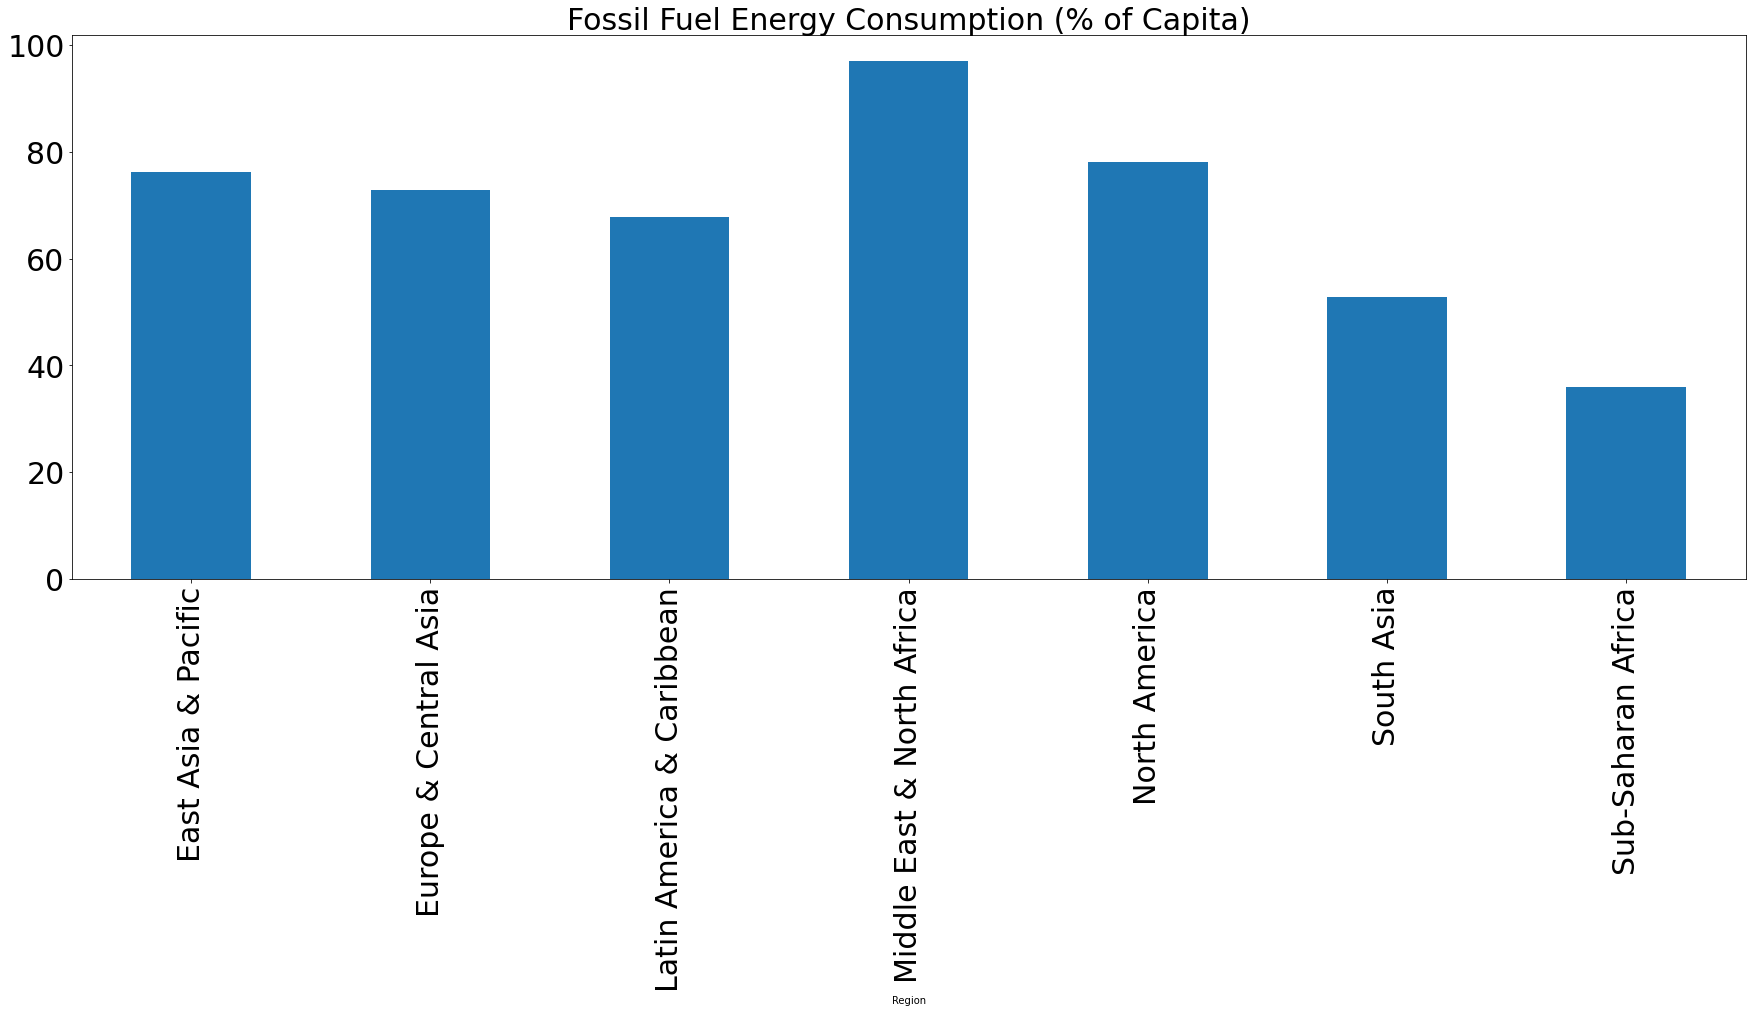

In [45]:
continent_fossil.plot.bar(figsize=(30,10), legend = None,  fontsize = 30)
plt.title("Fossil Fuel Energy Consumption (% of Capita)", fontsize = 30)

plt.show()

**[해석]**

- Middle East & North Africa: 산유국가들의 연료 사용 압도적으로 많음
- North America: 국가는 3개뿐이나 소비 주요국 미국이 있어서 2위
- East Asia & Pacific

In [14]:
fossil.loc[:,'YR2015'].dropna().sort_values()

country
Iceland            11.288869
Estonia            13.056215
Sweden             25.117096
Finland            40.207983
France             46.487971
Switzerland        50.168225
Norway             56.951629
New Zealand        59.749169
Slovenia           61.114199
Slovak Republic    64.091495
Denmark            64.927089
Austria            65.661822
Hungary            69.549794
Spain              72.955546
Canada             74.089062
Chile              74.647212
Belgium            75.870784
Portugal           77.024123
Czech Republic     77.734587
Germany            78.862551
Italy              79.948455
United Kingdom     80.351771
Luxembourg         80.562295
Korea, Rep.        81.028476
United States      82.427828
Greece             82.574635
Ireland            85.342820
Turkey             86.843188
Australia          89.625630
Poland             90.291375
Mexico             90.426208
Japan              93.026455
Netherlands        93.461005
Israel             97.382124
Name: 

### Renewable Energy Consumption

In [52]:
renewable.head(10)

,economy,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,Region
country,,,,,,,,,,
Aruba,ABW,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.699300,8.024100,Latin America & Caribbean
Afghanistan,AFG,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.082800,21.422701,South Asia
Angola,AGO,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.180500,56.785500,Sub-Saharan Africa
Albania,ALB,35.961102,40.046700,41.286999,38.697399,38.625599,39.587299,37.219799,38.266399,Europe & Central Asia
Andorra,AND,18.552200,18.762899,19.141300,19.420099,19.277700,19.255800,19.063200,18.506001,Europe & Central Asia
United Arab Emirates,ARE,0.109200,0.101800,0.102900,0.137700,0.126400,0.123000,0.173200,0.259200,Middle East & North Africa
Argentina,ARG,8.833100,8.611800,8.913400,9.781400,9.393200,9.376900,10.368500,10.520800,Latin America & Caribbean
Armenia,ARM,8.007200,6.563800,6.770000,7.080900,10.746900,13.151500,12.562600,11.133000,Europe & Central Asia
American Samoa,ASM,0.000000,0.899700,1.546300,1.520700,1.458700,1.721400,2.898100,2.856600,East Asia & Pacific


In [53]:
renewable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, Aruba to Zimbabwe
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   economy  217 non-null    object 
 1   YR2011   213 non-null    float64
 2   YR2012   213 non-null    float64
 3   YR2013   213 non-null    float64
 4   YR2014   213 non-null    float64
 5   YR2015   213 non-null    float64
 6   YR2016   213 non-null    float64
 7   YR2017   213 non-null    float64
 8   YR2018   213 non-null    float64
 9   Region   217 non-null    object 
dtypes: float64(8), object(2)
memory usage: 18.6+ KB


In [77]:
renewable.loc[:,'YR2018'].sort_values().head(50)

country
Qatar                        0.0000
Bahrain                      0.0000
Gibraltar                    0.0000
Northern Mariana Islands     0.0000
Oman                         0.0015
Cayman Islands               0.0087
Brunei Darussalam            0.0109
Saudi Arabia                 0.0157
Kuwait                       0.0336
Sint Maarten (Dutch part)    0.0511
Palau                        0.0519
Turkmenistan                 0.0566
Algeria                      0.1933
Hong Kong SAR, China         0.1954
United Arab Emirates         0.2592
Bermuda                      0.3803
Trinidad and Tobago          0.4546
Iraq                         0.4773
Turks and Caicos Islands     0.5096
Nauru                        0.6568
Singapore                    0.7273
Antigua and Barbuda          0.9049
Syrian Arab Republic         0.9384
Iran, Islamic Rep.           0.9950
Bahamas, The                 1.0193
Maldives                     1.1183
Seychelles                   1.2232
British Virgin Islan

In [75]:
renewable.groupby('Region')['YR2018'].mean()

Region
East Asia & Pacific           18.196362
Europe & Central Asia         21.819395
Latin America & Caribbean     19.919022
Middle East & North Africa     4.805624
North America                 10.890133
South Asia                    41.777050
Sub-Saharan Africa            62.186425
Name: YR2018, dtype: float64